In [ ]:
### set up the notebook
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import scipy.signal

In [20]:
### load the data

hourly_data = xr.open_dataset('./data/hourly_GNSS_ACCESS_ERA5_WTD.nc')

# save GNSS, ACCESS and ERA5 into seperate datasets
GNSS = hourly_data.GNSS_buoy
ACCESS = hourly_data.ACCESS
ERA5 = hourly_data.ERA5

In [21]:
### PSD calculation

# remove median from each time series and replace NaNs with 0
for i in range(9):
    GNSS[i,:] = GNSS.values[i,:] - np.nanmedian(GNSS.values[i,:])
    ACCESS[i,:] = ACCESS.values[i,:] - np.nanmedian(ACCESS.values[i,:])
    ERA5[i,:] = ERA5.values[i,:] - np.nanmedian(ERA5.values[i,:])
    
    GNSS[i,:] = GNSS[i,:].fillna(0)
    ACCESS[i,:] = ACCESS[i,:].fillna(0)
    ERA5[i,:] = ERA5[i,:].fillna(0)
    
# calculate PSD for each site using the welch method

sam_int = 1  # hours

# G_ for GNSS
G_freq_sn40, G_psd_sn40 = scipy.signal.welch(GNSS[0, :].values, fs=1/sam_int, scaling='density')
G_freq_sn20, G_psd_sn20 = scipy.signal.welch(GNSS[1, :].values, fs=1/sam_int, scaling='density')
G_freq_sn06, G_psd_sn06 = scipy.signal.welch(GNSS[2, :].values, fs=1/sam_int, scaling='density')
G_freq_ss05, G_psd_ss05 = scipy.signal.welch(GNSS[3, :].values, fs=1/sam_int, scaling='density')
G_freq_ss20, G_psd_ss20 = scipy.signal.welch(GNSS[4, :].values, fs=1/sam_int, scaling='density')
G_freq_ss30, G_psd_ss30 = scipy.signal.welch(GNSS[5, :].values, fs=1/sam_int, scaling='density')
G_freq_ss40, G_psd_ss40 = scipy.signal.welch(GNSS[6, :].values, fs=1/sam_int, scaling='density')
G_freq_swxt, G_psd_swxt = scipy.signal.welch(GNSS[7, :].values, fs=1/sam_int, scaling='density')
G_freq_sext, G_psd_sext = scipy.signal.welch(GNSS[8, :].values, fs=1/sam_int, scaling='density')

# A_ for ACCESS
A_freq_sn40, A_psd_sn40 = scipy.signal.welch(ACCESS[0, :].values, fs=1/sam_int, scaling='density')
A_freq_sn20, A_psd_sn20 = scipy.signal.welch(ACCESS[1, :].values, fs=1/sam_int, scaling='density')
A_freq_sn06, A_psd_sn06 = scipy.signal.welch(ACCESS[2, :].values, fs=1/sam_int, scaling='density')
A_freq_ss05, A_psd_ss05 = scipy.signal.welch(ACCESS[3, :].values, fs=1/sam_int, scaling='density')
A_freq_ss20, A_psd_ss20 = scipy.signal.welch(ACCESS[4, :].values, fs=1/sam_int, scaling='density')
A_freq_ss30, A_psd_ss30 = scipy.signal.welch(ACCESS[5, :].values, fs=1/sam_int, scaling='density')
A_freq_ss40, A_psd_ss40 = scipy.signal.welch(ACCESS[6, :].values, fs=1/sam_int, scaling='density')
A_freq_swxt, A_psd_swxt = scipy.signal.welch(ACCESS[7, :].values, fs=1/sam_int, scaling='density')
A_freq_sext, A_psd_sext = scipy.signal.welch(ACCESS[8, :].values, fs=1/sam_int, scaling='density')

# E_ for ERA5
E_freq_sn40, E_psd_sn40 = scipy.signal.welch(ERA5[0, :].values, fs=1/sam_int, scaling='density')
E_freq_sn20, E_psd_sn20 = scipy.signal.welch(ERA5[1, :].values, fs=1/sam_int, scaling='density')
E_freq_sn06, E_psd_sn06 = scipy.signal.welch(ERA5[2, :].values, fs=1/sam_int, scaling='density')
E_freq_ss05, E_psd_ss05 = scipy.signal.welch(ERA5[3, :].values, fs=1/sam_int, scaling='density')
E_freq_ss20, E_psd_ss20 = scipy.signal.welch(ERA5[4, :].values, fs=1/sam_int, scaling='density')
E_freq_ss30, E_psd_ss30 = scipy.signal.welch(ERA5[5, :].values, fs=1/sam_int, scaling='density')
E_freq_ss40, E_psd_ss40 = scipy.signal.welch(ERA5[6, :].values, fs=1/sam_int, scaling='density')
E_freq_swxt, E_psd_swxt = scipy.signal.welch(ERA5[7, :].values, fs=1/sam_int, scaling='density')
E_freq_sext, E_psd_sext = scipy.signal.welch(ERA5[8, :].values, fs=1/sam_int, scaling='density')

# the frequency arrays are all the same, so save freq and take the mean across sites for each
freq = G_freq_sn40
GNSS_psd = np.nanmean([G_psd_sn40, G_psd_sn20, G_psd_sn06, G_psd_ss05, G_psd_ss20, G_psd_ss30, G_psd_ss40, G_psd_swxt, G_psd_sext], axis=0)
ACCESS_psd = np.nanmean([A_psd_sn40, A_psd_sn20, A_psd_sn06, A_psd_ss05, A_psd_ss20, A_psd_ss30, A_psd_ss40, A_psd_swxt, A_psd_sext], axis=0)
ERA5_psd = np.nanmean([E_psd_sn40, E_psd_sn20, E_psd_sn06, E_psd_ss05, E_psd_ss20, E_psd_ss30, E_psd_ss40, E_psd_swxt, E_psd_sext], axis=0)


/tmp/ipykernel_1879385/954482637.py:4: RuntimeWarning: divide by zero encountered in true_divide
  ax.loglog(1/freq, GNSS_psd, c='C1', lw=2, label='GNSS')
/tmp/ipykernel_1879385/954482637.py:5: RuntimeWarning: divide by zero encountered in true_divide
  ax.loglog(1/freq, ACCESS_psd, c='C0', lw=2, label='ACCESS')
/tmp/ipykernel_1879385/954482637.py:6: RuntimeWarning: divide by zero encountered in true_divide
  ax.loglog(1/freq, ERA5_psd, c='C2', lw=2, label='ERA5')


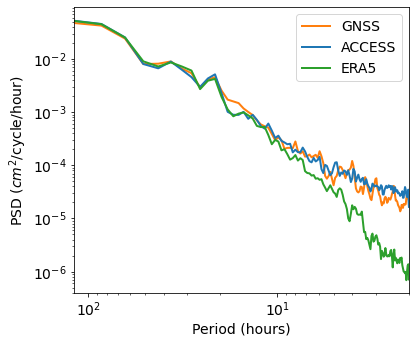

In [23]:
### Plot the PSD

fig, ax = plt.subplots(1, figsize=(6, 5))
ax.loglog(1/freq, GNSS_psd, c='C1', lw=2, label='GNSS')
ax.loglog(1/freq, ACCESS_psd, c='C0', lw=2, label='ACCESS')
ax.loglog(1/freq, ERA5_psd, c='C2', lw=2, label='ERA5')
ax.invert_xaxis()
ax.set_ylabel('PSD ($m^2$/cycle/hour)')
ax.set_xlabel('Period (hours)')
ax.set_xlim(120, 2)
ax.legend()
plt.tight_layout()
plt.show()

In [24]:
### Calculate the coherence

# Coherence for ACCESS
f_co_a_sn40, Cxy_a_sn40 = scipy.signal.coherence(ACCESS[0, :].values, GNSS[0, :].values, fs=1/sam_int, window='hanning', detrend='constant', nperseg=256)
f_co_a_sn20, Cxy_a_sn20 = scipy.signal.coherence(ACCESS[1, :].values, GNSS[1, :].values, fs=1/sam_int, window='hanning', detrend='constant', nperseg=256)
f_co_a_sn06, Cxy_a_sn06 = scipy.signal.coherence(ACCESS[2, :].values, GNSS[2, :].values, fs=1/sam_int, window='hanning', detrend='constant', nperseg=256)
f_co_a_ss05, Cxy_a_ss05 = scipy.signal.coherence(ACCESS[3, :].values, GNSS[3, :].values, fs=1/sam_int, window='hanning', detrend='constant', nperseg=256)
f_co_a_ss20, Cxy_a_ss20 = scipy.signal.coherence(ACCESS[4, :].values, GNSS[4, :].values, fs=1/sam_int, window='hanning', detrend='constant', nperseg=256)
f_co_a_ss30, Cxy_a_ss30 = scipy.signal.coherence(ACCESS[5, :].values, GNSS[5, :].values, fs=1/sam_int, window='hanning', detrend='constant', nperseg=256)
f_co_a_ss40, Cxy_a_ss40 = scipy.signal.coherence(ACCESS[6, :].values, GNSS[6, :].values, fs=1/sam_int, window='hanning', detrend='constant', nperseg=256)
f_co_a_swxt, Cxy_a_swxt = scipy.signal.coherence(ACCESS[7, :].values, GNSS[7, :].values, fs=1/sam_int, window='hanning', detrend='constant', nperseg=256)
f_co_a_sext, Cxy_a_sext = scipy.signal.coherence(ACCESS[8, :].values, GNSS[8, :].values, fs=1/sam_int, window='hanning', detrend='constant', nperseg=256)

# Coherence for ERA5
f_co_e_sn40, Cxy_e_sn40 = scipy.signal.coherence(ERA5[0, :].values, GNSS[0, :].values, fs=1/sam_int, window='hanning', detrend='constant', nperseg=256)
f_co_e_sn20, Cxy_e_sn20 = scipy.signal.coherence(ERA5[1, :].values, GNSS[1, :].values, fs=1/sam_int, window='hanning', detrend='constant', nperseg=256)
f_co_e_sn06, Cxy_e_sn06 = scipy.signal.coherence(ERA5[2, :].values, GNSS[2, :].values, fs=1/sam_int, window='hanning', detrend='constant', nperseg=256)
f_co_e_ss05, Cxy_e_ss05 = scipy.signal.coherence(ERA5[3, :].values, GNSS[3, :].values, fs=1/sam_int, window='hanning', detrend='constant', nperseg=256)
f_co_e_ss20, Cxy_e_ss20 = scipy.signal.coherence(ERA5[4, :].values, GNSS[4, :].values, fs=1/sam_int, window='hanning', detrend='constant', nperseg=256)
f_co_e_ss30, Cxy_e_ss30 = scipy.signal.coherence(ERA5[5, :].values, GNSS[5, :].values, fs=1/sam_int, window='hanning', detrend='constant', nperseg=256)
f_co_e_ss40, Cxy_e_ss40 = scipy.signal.coherence(ERA5[6, :].values, GNSS[6, :].values, fs=1/sam_int, window='hanning', detrend='constant', nperseg=256)
f_co_e_swxt, Cxy_e_swxt = scipy.signal.coherence(ERA5[7, :].values, GNSS[7, :].values, fs=1/sam_int, window='hanning', detrend='constant', nperseg=256)
f_co_e_sext, Cxy_e_sext = scipy.signal.coherence(ERA5[8, :].values, GNSS[8, :].values, fs=1/sam_int, window='hanning', detrend='constant', nperseg=256)

# Mean coherence for ACCESS
f_co_a = f_co_a_sn40
Cxy_a = np.nanmean([Cxy_a_sn40, Cxy_a_sn20, Cxy_a_sn06, Cxy_a_ss05, Cxy_a_ss20, Cxy_a_ss30, Cxy_a_ss40, Cxy_a_swxt, Cxy_a_sext], axis=0)

# Mean coherence for ERA5
f_co_e = f_co_e_sn40
Cxy_e = np.nanmean([Cxy_e_sn40, Cxy_e_sn20, Cxy_e_sn06, Cxy_e_ss05, Cxy_e_ss20, Cxy_e_ss30, Cxy_e_ss40, Cxy_e_swxt, Cxy_e_sext], axis=0)

/tmp/ipykernel_1879385/382597095.py:4: RuntimeWarning: divide by zero encountered in true_divide
  ax.semilogx(1/f_co_a, Cxy_a, c='C0', lw=2, label='ACCESS')
/tmp/ipykernel_1879385/382597095.py:5: RuntimeWarning: divide by zero encountered in true_divide
  ax.semilogx(1/f_co_e, Cxy_e, c='C2', lw=2, label='ERA5')


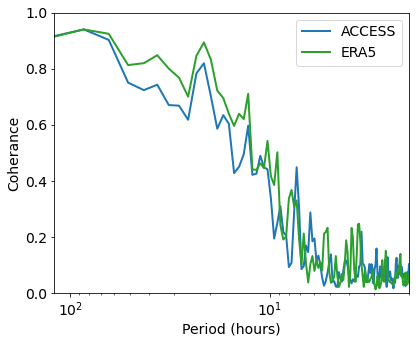

In [25]:
### Plot the coherance

fig, ax = plt.subplots(1, figsize=(6, 5))
ax.semilogx(1/f_co_a, Cxy_a, c='C0', lw=2, label='ACCESS')
ax.semilogx(1/f_co_e, Cxy_e, c='C2', lw=2, label='ERA5')
ax.invert_xaxis()
ax.set_ylabel('Coherance')
ax.set_xlabel('Period (hours)')
ax.set_xlim(120, 2)
ax.set_ylim(0, 1)
ax.legend()
plt.tight_layout()
plt.show()